In [1]:
import pandas as pd
pd.set_option('display.max_columns', 40)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
highlight_url = 'https://raw.githubusercontent.com/asonty/ngs_highlights/master/utils/data/nfl_ngs_highlights_index.tsv'
highlight_df = pd.read_csv(highlight_url, sep ='\t')

In [3]:
print(highlight_df.loc[(highlight_df.team == 'DAL') & (highlight_df.playId == 1340)].playDesc.values)

['(12:23) (No Huddle, Shotgun) D.Prescott pass deep left to A.Cooper to WAS 16 for 48 yards (K.Ladler). Penalty on WAS-R.Anderson, Defensive Offside, declined.']


In [15]:
highlight_df.tail()

,playKey,playDesc,team,season,week,gameId,playId
562,563,"(1:29) (No Huddle, Shotgun) D.Haskins pass sho...",WAS,2019,4,2019092907,2823
563,564,"(9:39) S.Sims right end for 65 yards, TOUCHDOW...",WAS,2019,5,2019100609,431
564,565,(10:11) (Shotgun) D.Haskins pass short right t...,WAS,2019,11,2019111707,3624
565,566,(1:22) (Shotgun) D.Haskins pass short middle t...,WAS,2019,14,2019120803,3729
566,567,(1:23) D.Haskins pass short middle to T.McLaur...,WAS,2019,15,2019121508,700


In [23]:
ids = ['2019_WAS_2019100609_431', 
       '2019_DAL_2019122904_1340',]

In [44]:
plays_lst = []
for x in ids:
    play_url = 'https://raw.githubusercontent.com/asonty/ngs_highlights/master/play_data/{}.tsv'.format(x)
    play_df = pd.read_csv(play_url, sep = '\t')
    plays_lst.append(play_df)

In [47]:
pd.concat(plays_lst).playType.value_counts()

play_type_rush    10678
play_type_pass     4670
Name: playType, dtype: int64

In [33]:
pd.read_csv('https://raw.githubusercontent.com/asonty/ngs_highlights/master/play_data/{}.tsv'.format(ids[0]), sep = '\t')

,gameId,playId,playType,season,seasonType,week,preSnapHomeScore,preSnapVisitorScore,playDirection,quarter,gameClock,down,yardsToGo,yardline,yardlineSide,yardlineNumber,absoluteYardlineNumber,possessionFlag,homeTeamFlag,teamAbbr,frame,displayName,esbId,gsisId,jerseyNumber,nflId,position,positionGroup,time,x,y,s,o,dir,event,playDescription
0,2019100609,431,play_type_rush,2019,REG,5,0,0,right,1,09:39,2,8,WAS 35,WAS,35,45,1.0,1.0,WAS,0,Colt McCoy,MCC603149,00-0027688,12.0,497123.0,QB,QB,2019-10-06 17:17:16.200,39.53,27.25,0.17,323.79,8.09,huddle_start_offense,"(9:39) S.Sims right end for 65 yards, TOUCHDOW..."
1,2019100609,431,play_type_rush,2019,REG,5,0,0,right,1,09:39,2,8,WAS 35,WAS,35,45,1.0,1.0,WAS,1,Colt McCoy,MCC603149,00-0027688,12.0,497123.0,QB,QB,2019-10-06 17:17:16.300,39.53,27.27,0.16,325.97,6.58,NaN,"(9:39) S.Sims right end for 65 yards, TOUCHDOW..."
2,2019100609,431,play_type_rush,2019,REG,5,0,0,right,1,09:39,2,8,WAS 35,WAS,35,45,1.0,1.0,WAS,2,Colt McCoy,MCC603149,00-0027688,12.0,497123.0,QB,QB,2019-10-06 17:17:16.400,39.53,27.29,0.15,326.75,5.63,NaN,"(9:39) S.Sims right end for 65 yards, TOUCHDOW..."
3,2019100609,431,play_type_rush,2019,REG,5,0,0,right,1,09:39,2,8,WAS 35,WAS,35,45,1.0,1.0,WAS,3,Colt McCoy,MCC603149,00-0027688,12.0,497123.0,QB,QB,2019-10-06 17:17:16.500,39.52,27.29,0.13,328.49,4.14,NaN,"(9:39) S.Sims right end for 65 yards, TOUCHDOW..."
4,2019100609,431,play_type_rush,2019,REG,5,0,0,right,1,09:39,2,8,WAS 35,WAS,35,45,1.0,1.0,WAS,4,Colt McCoy,MCC603149,00-0027688,12.0,497123.0,QB,QB,2019-10-06 17:17:16.600,39.53,27.30,0.12,330.29,6.33,NaN,"(9:39) S.Sims right end for 65 yards, TOUCHDOW..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10673,2019100609,431,play_type_rush,2019,REG,5,0,0,right,1,09:39,2,8,WAS 35,WAS,35,45,NaN,NaN,NaN,517,ball,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-06 17:18:07.900,85.91,-0.01,0.32,NaN,NaN,NaN,"(9:39) S.Sims right end for 65 yards, TOUCHDOW..."
10674,2019100609,431,play_type_rush,2019,REG,5,0,0,right,1,09:39,2,8,WAS 35,WAS,35,45,NaN,NaN,NaN,518,ball,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-06 17:18:08.000,85.90,0.02,0.30,NaN,NaN,NaN,"(9:39) S.Sims right end for 65 yards, TOUCHDOW..."
10675,2019100609,431,play_type_rush,2019,REG,5,0,0,right,1,09:39,2,8,WAS 35,WAS,35,45,NaN,NaN,NaN,519,ball,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-06 17:18:08.100,85.86,0.09,0.44,NaN,NaN,NaN,"(9:39) S.Sims right end for 65 yards, TOUCHDOW..."
10676,2019100609,431,play_type_rush,2019,REG,5,0,0,right,1,09:39,2,8,WAS 35,WAS,35,45,NaN,NaN,NaN,520,ball,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-06 17:18:08.200,85.80,0.10,0.43,NaN,NaN,NaN,"(9:39) S.Sims right end for 65 yards, TOUCHDOW..."


In [4]:
play_url = 'https://raw.githubusercontent.com/asonty/ngs_highlights/master/play_data/{}'.format(id)
play_df = pd.read_csv(play_url, sep= '\t')

In [5]:
single_frame = play_df.loc[play_df.frame == 10]

In [6]:
single_frame.head()

,gameId,playId,playType,season,seasonType,week,preSnapHomeScore,preSnapVisitorScore,playDirection,quarter,gameClock,down,yardsToGo,yardline,yardlineSide,yardlineNumber,absoluteYardlineNumber,possessionFlag,homeTeamFlag,teamAbbr,frame,displayName,esbId,gsisId,jerseyNumber,nflId,position,positionGroup,time,x,y,s,o,dir,event,playDescription
10,2019122904,1340,play_type_pass,2019,REG,17,6,3,left,2,12:23,3,9,DAL 36,DAL,36,74,1.0,1.0,DAL,10,Randall Cobb,COB365535,00-0028002,18.0,2495448.0,WR,WR,2019-12-29 22:24:01.800,75.59,17.32,0.02,281.43,8.52,NaN,"(12:23) (No Huddle, Shotgun) D.Prescott pass d..."
213,2019122904,1340,play_type_pass,2019,REG,17,6,3,left,2,12:23,3,9,DAL 36,DAL,36,74,1.0,1.0,DAL,10,Jason Witten,WIT559021,00-0022127,82.0,2505629.0,TE,TE,2019-12-29 22:24:01.800,74.56,20.32,0.02,295.90,109.22,NaN,"(12:23) (No Huddle, Shotgun) D.Prescott pass d..."
416,2019122904,1340,play_type_pass,2019,REG,17,6,3,left,2,12:23,3,9,DAL 36,DAL,36,74,1.0,1.0,DAL,10,Joe Looney,LOO721674,00-0029278,73.0,2532896.0,C,OL,2019-12-29 22:24:01.800,75.48,25.96,0.00,299.63,36.63,NaN,"(12:23) (No Huddle, Shotgun) D.Prescott pass d..."
619,2019122904,1340,play_type_pass,2019,REG,17,6,3,left,2,12:23,3,9,DAL 36,DAL,36,74,1.0,1.0,DAL,10,Travis Frederick,FRE063393,00-0030546,72.0,2540161.0,C,OL,2019-12-29 22:24:01.800,74.50,27.58,0.00,288.01,350.01,NaN,"(12:23) (No Huddle, Shotgun) D.Prescott pass d..."
822,2019122904,1340,play_type_pass,2019,REG,17,6,3,left,2,12:23,3,9,DAL 36,DAL,36,74,1.0,1.0,DAL,10,Zack Martin,MAR771661,00-0031402,70.0,2543480.0,G,OL,2019-12-29 22:24:01.800,75.38,29.23,0.00,281.38,272.33,NaN,"(12:23) (No Huddle, Shotgun) D.Prescott pass d..."


In [7]:
player_play_df = play_df.loc[play_df.nflId ==  2552487.0]

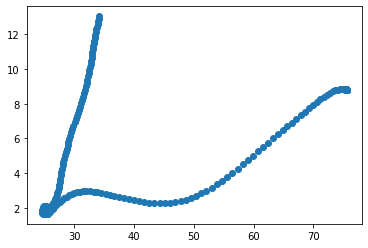

In [8]:
plt.scatter(player_play_df.x, player_play_df.y)

In [9]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

No handles with labels found to put in legend.


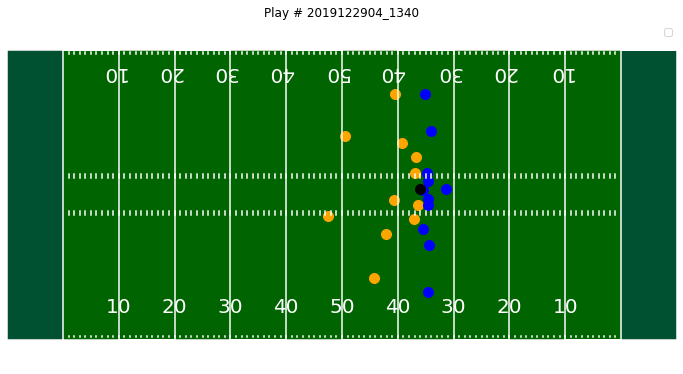

In [12]:
yl = single_frame.yardlineNumber.reset_index(drop=True)[0]
fig, ax = create_football_field(highlight_line=False,
                                #highlight_line_number=yl
                               )


single_frame.query('homeTeamFlag == 0') \
    .plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=100, legend='Away')

single_frame.query('homeTeamFlag == 1') \
    .plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=100, legend='Home')

single_frame.query("displayName == 'ball'") \
    .plot(x='x', y='y', kind='scatter', ax=ax, color='black', s = 100, legend='Ball')


plt.title('Play # 2019122904_1340')
plt.legend()
plt.show()

In [48]:
fig.savefig('testingSave.png')